In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
test=pd.read_csv(r"G:\Loan Prediction Data\data.csv")
train= pd.read_csv(r"G:\Loan Prediction Data\datatest.csv")

In [3]:
train.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Univariate Analysis

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

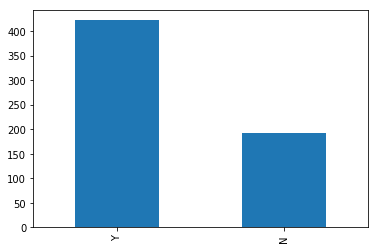

In [9]:
train['Loan_Status'].value_counts().plot.bar()

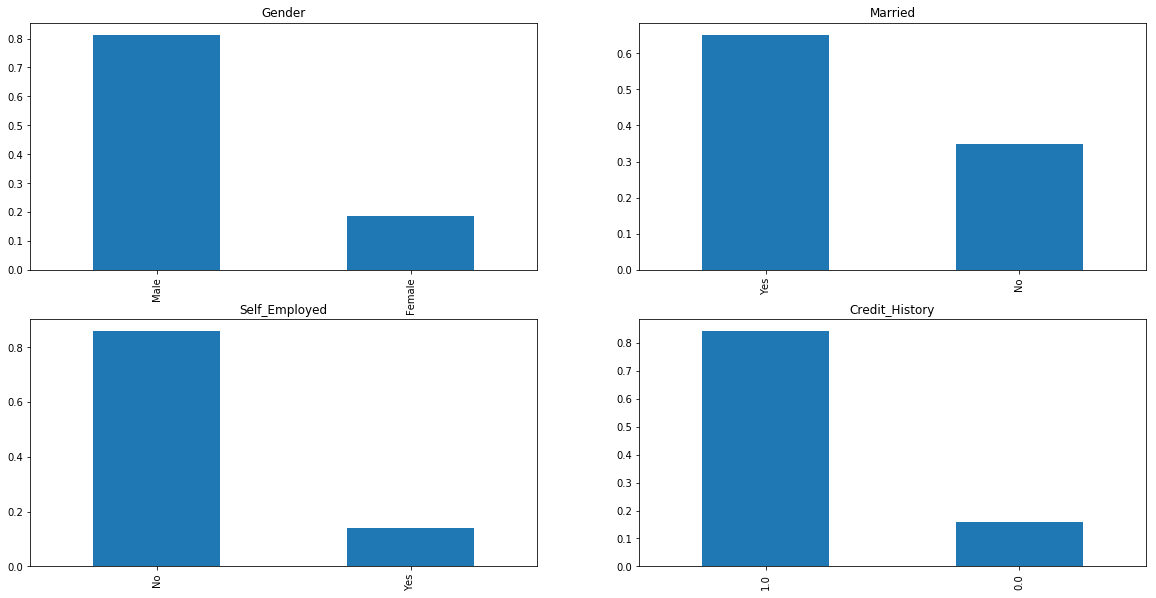

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [13]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [15]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [16]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [18]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [19]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
x_train.shape

(429, 20)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [42]:
model= Sequential()

In [43]:
model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu", input_dim=20))

In [44]:
model.add(Dropout(p=0.1))

In [45]:
model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu"))

In [46]:
model.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))

In [47]:
#if more than one dependant variables, use Softmax and make output dim as no of dependant varibles
#also use performance tuning
#more than one dependant othr loss function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
model.fit(x_train, y_train, batch_size=20, epochs=50)

Epoch 1/50
429/429 [==============================] - 0s 707us/step - loss: 0.6994 - acc: 0.5152
Epoch 2/50
429/429 [==============================] - 0s 60us/step - loss: 0.6781 - acc: 0.6807
Epoch 3/50
429/429 [==============================] - 0s 60us/step - loss: 0.6606 - acc: 0.6876
Epoch 4/50
429/429 [==============================] - 0s 72us/step - loss: 0.6570 - acc: 0.6853
Epoch 5/50
429/429 [==============================] - 0s 67us/step - loss: 0.6464 - acc: 0.6876
Epoch 6/50
429/429 [==============================] - 0s 72us/step - loss: 0.6446 - acc: 0.6923
Epoch 7/50
429/429 [==============================] - 0s 56us/step - loss: 0.6484 - acc: 0.6853
Epoch 8/50
429/429 [==============================] - 0s 72us/step - loss: 0.6450 - acc: 0.6900
Epoch 9/50
429/429 [==============================] - 0s 77us/step - loss: 0.6423 - acc: 0.6876
Epoch 10/50
429/429 [==============================] - 0s 72us/step - loss: 0.6498 - acc: 0.6876
Epoch 11/50
429/429 [=================

In [49]:
pred_cv = model.predict(x_cv)

In [50]:
predictions = []

for x in pred_cv:
    if x>0.5:
        predictions.append(1)
    else:
        predictions.append(0)

predictions= pd.Series(predictions)    

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_cv,predictions)

0.69729729729729728

In [52]:
#Performance Tuning

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [53]:
def build_model():
    model= Sequential()
    model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu", input_dim=20))
    model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu"))
    model.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model    

In [54]:
model= KerasClassifier(build_fn= build_model, batch_size=10, epochs=50)


In [55]:
accuracies=cross_val_score(estimator= model, X=x_train, y= y_train) #n_jobs=-1 means all GPU work parellel

Epoch 1/50
286/286 [==============================] - 0s 1ms/step - loss: 0.6590 - acc: 0.6888
Epoch 2/50
286/286 [==============================] - 0s 115us/step - loss: 0.6440 - acc: 0.6853
Epoch 3/50
286/286 [==============================] - 0s 129us/step - loss: 0.6387 - acc: 0.6853
Epoch 4/50
286/286 [==============================] - 0s 119us/step - loss: 0.6411 - acc: 0.6853
Epoch 5/50
286/286 [==============================] - 0s 87us/step - loss: 0.6382 - acc: 0.6853
Epoch 6/50
286/286 [==============================] - ETA: 0s - loss: 0.6006 - acc: 0.700 - 0s 122us/step - loss: 0.6351 - acc: 0.6853
Epoch 7/50
286/286 [==============================] - 0s 126us/step - loss: 0.6362 - acc: 0.6853
Epoch 8/50
286/286 [==============================] - 0s 122us/step - loss: 0.6361 - acc: 0.6888
Epoch 9/50
286/286 [==============================] - 0s 108us/step - loss: 0.6339 - acc: 0.6888
Epoch 10/50
286/286 [==============================] - 0s 139us/step - loss: 0.6316 - acc: 0

286/286 [==============================] - 0s 94us/step - loss: 0.5992 - acc: 0.7063
Epoch 34/50
286/286 [==============================] - 0s 122us/step - loss: 0.5994 - acc: 0.7028
Epoch 35/50
286/286 [==============================] - 0s 112us/step - loss: 0.5975 - acc: 0.7028
Epoch 36/50
286/286 [==============================] - 0s 108us/step - loss: 0.6022 - acc: 0.6888
Epoch 37/50
286/286 [==============================] - 0s 98us/step - loss: 0.5964 - acc: 0.7098
Epoch 38/50
286/286 [==============================] - 0s 94us/step - loss: 0.5960 - acc: 0.6993
Epoch 39/50
286/286 [==============================] - 0s 119us/step - loss: 0.5889 - acc: 0.7028
Epoch 40/50
286/286 [==============================] - 0s 94us/step - loss: 0.6036 - acc: 0.7028
Epoch 41/50
286/286 [==============================] - 0s 108us/step - loss: 0.5924 - acc: 0.7098
Epoch 42/50
286/286 [==============================] - 0s 119us/step - loss: 0.5946 - acc: 0.7028
Epoch 43/50
286/286 [===============

In [56]:
mean=accuracies.mean()
print(mean)

0.680652681625


In [57]:
variance= accuracies.std()
print(variance)

0.0287385231916


In [58]:
#has low variance and low bias
#has to improve the ANN

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
def build_model():
    model= Sequential()
    model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu", input_dim=20))
    model.add(Dense(units=6, kernel_initializer="uniform", activation= "relu"))
    model.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model    

In [60]:
model= KerasClassifier(build_fn= build_model)

In [68]:
parameters= {'batch_size': [10, 32],'nb_epoch': [100, 500]}

In [69]:
grid_search= GridSearchCV(estimator=model, param_grid = parameters, scoring= 'accuracy', cv=10)

In [70]:
grid_search= grid_search.fit(x_train, y_train)

Epoch 1/1
386/386 [==============================] - 0s 976us/step - loss: 0.6690 - acc: 0.6762
Epoch 1/1
386/386 [==============================] - 0s 1ms/step - loss: 0.6706 - acc: 0.6917
Epoch 1/1
386/386 [==============================] - 0s 1ms/step - loss: 0.6507 - acc: 0.6839
Epoch 1/1
386/386 [==============================] - 1s 1ms/step - loss: 0.6645 - acc: 0.6710
Epoch 1/1
386/386 [==============================] - 1s 1ms/step - loss: 0.7023 - acc: 0.4430
Epoch 1/1
386/386 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.6658
Epoch 1/1
386/386 [==============================] - 1s 2ms/step - loss: 0.6678 - acc: 0.6813
Epoch 1/1
386/386 [==============================] - 1s 2ms/step - loss: 0.6788 - acc: 0.6762
Epoch 1/1
386/386 [==============================] - 1s 1ms/step - loss: 0.6906 - acc: 0.6062
Epoch 1/1
387/387 [==============================] - 1s 1ms/step - loss: 0.6838 - acc: 0.6796
Epoch 1/1
386/386 [==============================] - 1s 2m

In [71]:
best_parameters= grid_search.best_params_

In [72]:
best_accuracy= grid_search.best_score_

In [73]:
print(best_accuracy)

0.687645687646
